# IBM Applied Data Science - Capstone Project
*Notebook used for submission in capstone project*

## Prediction of Car Accident Severity in Seattle, USA

The purpose of this exploratory data analysis exercise is to assess the possibility and accuracy to predict car accident severity in Seattle, USA exploiting collision track records from past accidents that were recorded by the Seattle Police Department (SPD) and provided as open data by Traffic Records.

Being able to predict car accident severity from extrenal factors like weather, location, road conditions as well as speeding, influence of alcohol/drugs etc. will allow the government to put appropriate meassures in place to reduce accident severity, but above all, allow the police and first response teams to channel their ressources and increase efficiency

Using car accident track records from March 2013, the predictive modelling analysis shows, that xxx. 

The study was carried out in October 2020.

***

### Table of Contents

1. Introduction
2. Data Overview
3. Methodology
4. Code
    4.1 Functions   
5. Results
6. Conclusions

***

<a id='1_introduction'></a>
### 1. Introduction

Despite the fact that the US population has increased threefold since the beginning of the 20th century and the total number of cars cracking the 280 million mark in 2019 ([source](https://www.statista.com/statistics/859950/vehicles-in-operation-by-quarter-united-states/)), leading to a whopping 3000 billion miles travelled p.a., fatality rates in traffice continously decline [Fig. 1](#wiki_plot).
This decrease of deaths in car accidents is related to measures, enforced by the law (e.g. [seat belt law, 1968](https://en.wikipedia.org/wiki/Seat_belt_laws_in_the_United_States)), advanced safety features (mandatory [air bags](https://www.history.com/this-day-in-history/federal-legislation-makes-airbags-mandatory) (1998)), but also improved road safety (e.g. signs, traffic lights etc.).

Moreover, thanks to technical advances in computer technology in the last decades, efficient measures can be taken even after an accident happened, e.g. by minimizing the response time of emergency teams and police through the smart analysis of accident records.

This coding exercise demonstrates how collision records can be analysed and provide insight into predicting car accident severity using the example of Seattle, USA.

<a id='wiki_plot'></a>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/US_traffic_deaths_per_VMT%2C_VMT%2C_per_capita%2C_and_total_annual_deaths.png/1280px-US_traffic_deaths_per_VMT%2C_VMT%2C_per_capita%2C_and_total_annual_deaths.png" width="700" >
**Fig. 1**: Development of annual car accident fatalities in the US. 
The graph shows annual US miles traveled (blue), traffic fatalities per billion vehicle miles traveled (red), per million people (orange), total annual deaths (light blue), Vehicle miles travelled (VMT) in 10s of billions (dark blue) and US population in millions (turquise) ([source](https://en.wikipedia.org/wiki/Motor_vehicle_fatality_rate_in_U.S._by_year#/media/File:US_traffic_deaths_per_VMT,_VMT,_per_capita,_and_total_annual_deaths.png)).

***


<a id='2_data'></a>
### 2. Data Overview

The data used in this project is was recorded by the Seattle Police Department (SPD) and provided as open data by Traffic Records. The spradsheet can be downloaded free of charge from the [Seattle GeoData Portal](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-122.326%2C47.592%2C-122.318%2C47.594) and have been acquired since 2004.

The dataset used in this study comprises **194673** accidents, recorded and documented in Seattle in March 2013.
Apart from the target variable, the severity of the collision `SEVERITYCODE`, meta information from 37 additional features are available. These comprise information about location of the accident (e.g. `X`,`Y`,`LOCATION`, `JUNCTIONTYPE`, `CROSSWALKKEY`, `SEGLANEKEY`,`HITPARKEDCAR`, `ADDRTYPE`), external factors (e.g. `LIGHTCOND`, `WEATHER`, `ROADCOND`) or lawlessness (e.g. `INATTENTIONIND`,`UNDERINFL`, `PEDROWNOTGRN`, `SPEEDING`).

The severity of the collision is categorised as
* **1: Accidents resulting in property damage**
* **2: Accidents resulting in injuries**

For additional information about the individual attributes kindly refer to the official corresponding documentation that can be found [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf).

A first overview of the spatial distribution of car accidents in 2013 can be found below. Note the increased number of accident at intersections (zoom in).

<a id='libraries'></a>

In [518]:
%matplotlib inline


# import libraries
import pandas as pd 
import numpy as np 
import random

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import os.path
from IPython.display import clear_output

<a id='load_data'></a>

In [14]:
# Load the data and save data to pandas data frame
data_url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(data_url)

/Users/martin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [276]:
# Plot heatmap from accidents

loc = 'Density Map of Traffic Accidents, Seattle (March 2013)'
title_html = '''
             <h3 align="center" style="font-size:15px"><b>{}</b></h3>
             '''.format(loc)  

locations = df[['Y', 'X']][df['Y'].notna()]
heatmap = folium.Map(location=[47.605, -122.3], zoom_start=11, tiles='CartoDB dark_matter')

heatmap.add_child(folium.plugins.HeatMap(locations[['Y', 'X']].values, radius=8, cmap='viridis'))
heatmap.get_root().html.add_child(folium.Element(title_html))
heatmap

***
<a id='3_methodology'></a>
### 3. Methodology

The data analysis workflow is designed as follows:

**1\.  Data Loading**: 
* Downloading the data from the online repository and storing into Pandas dataframe.

**2\. Data Overview**:
* Exploring the data dimensionality, format, quality, and volume.

**3\. Data Clean-up**:
* Re-formatting and encoding the data to make fit-for-purpose.

**4\. Exploratory Data Analysis**:
* Getting insight into distribution, frequency, anc correlation of features. 
* Pre-selection of input features for model training.

**5\. Model Building**:
* Normalizing the data
* Benchmarking different models against each other (K-Nearest Neighbour, Decision Tree, Logistic Regression)

**6\. Model Deployment and Evaluation**

***



<a id='4_code'></a>
### 4. Code
**Note:** Data has already been loaded to display the heat map [here](#load_data).{: .note}

Used libraries can be found above [here](#libraries).

Observations are documented in the code ore below in blue boxes. 

**Key variables:**

`df`:    Data frame with raw data

`df_c_fin`: Data frame with cleaned-up data

`*_INT`: Factorised object-type feature in dataframe 
***

<a id='4.1_functions'></a>
#### 4.1 Functions
In order to simplify the data analysis, various functions were written.

In [96]:
# Count number of NaNs in dataframe

def df_qc(df):

    missing_data = df.isnull()
    df_nan = pd.DataFrame(columns=['ID', 'val', 'nan'])

    for column in missing_data.columns.values.tolist():
        try:
            val_ok = missing_data[column].value_counts()[0]
            val_nan = missing_data[column].value_counts()[1]

            df_new_row = pd.DataFrame(data=np.array([[column,val_ok,val_nan]]), columns=['ID','val','nan'])
            df_nan = pd.concat([df_nan,df_new_row], ignore_index=True)

        except:
            val_ok = missing_data[column].value_counts()[0]
            df_new_row = pd.DataFrame(data=np.array([[column,val_ok,0]]), columns=['ID','val','nan'])
            df_nan = pd.concat([df_nan,df_new_row], ignore_index=True)

    # cast values as integer
    df_nan = df_nan.astype({'val' :'int','nan':'int'})

    df_nan.set_index('ID', inplace=True)
    df_nan.sort_values(['nan'], ascending=True, axis=0, inplace=True)

    return df_nan


# Function to plot histograms from features
def plt_hist_col(data_frame,column_name):
    '''
    Function to plot distribution of unique value counts of a SINGLE COLUMN in a data frame.
    
    INPUT:
    data_frame: Pandas data frame
    column_name: exact column name (STR)
    '''
    
    tot_len = len(data_frame[column_name])
    data_frame_perc = round((pd.Series(data_frame[column_name]).value_counts() / tot_len * 100),3)
    td = data_frame_perc.to_frame()

    ax1 = td.plot(kind="bar", figsize=(14,3), rot=90, width = 0.4)
    ax1.set_yticks(np.arange(0, 110, 10))
    ax1.set_title('Relative distribution of value counts for '+ str(column_name)+'  ('+str(tot_len)+' total)', fontsize=12)
    
    for p in ax1.patches:
        ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() + 2), fontsize=10, color="r")
    plt.show()
    
    return(ax1)

        

    
# Interactively QC all column data types and output list with features, that shall be removed
def df_type_qc(data_frame_r, verbose=True):
    
    '''
    Function to interactively QC all column data types and cast them into other types if required.
    Returns a list del_list with column names to be deleted in next step.
    
    INPUT:
    data_frame_r: Pandas data frame
    verbose=True: Output of statistics True/False (BOOLEAN)
    OUTPUT:
    data_frame: QCed data frame
    del_list: List with column names to be deleted
    '''
    
    data_frame = data_frame_r.copy() # copy input df
    hist_max = 50 # number of maximum unique values to plot histogram
    del_list = [] # list with columns to be deleted
    i = 0
    cast = ""
    
    len_df = len(data_frame.columns) # number of columns
    missing_data = data_frame.isnull() # count missing data and create df with True/False
    
    # iterate through all columns and check data type
    # user input to cast into different data type
    
    while i < (len_df) and cast != "x": # total number of columns
        col_name = str(data_frame.columns[i]) #column name
        
        
        
        # calculate missing data per column
        val_nan = 0
        val_ok = 0
        
        try:
            val_ok = missing_data[col_name].value_counts()[0]
            val_nan = missing_data[col_name].value_counts()[1]
            tot_count = len(data_frame[col_name])

        except:
            val_ok = missing_data[col_name].value_counts()[0]
            tot_count = len(data_frame[col_name])
 
        # if verbose=True output 
        if verbose:
            #clear_output()
            print(f"######################################")
            print(f"{i+1}/{len_df}: {col_name}")
            #print("----------STATS----------")
            print(f"\ttotal:\t{tot_count}")
            print(f"\tOK:\t{val_ok}\t({val_ok/tot_count*100}%)")
            print(f"\tNaN:\t{val_nan}\t({val_nan/tot_count*100}%)")
            
            print("----------HEAD----------")
            print(f"{data_frame[col_name].head()}\n")
            #random.randint(0,100)
            
            
            if len(data_frame[col_name].value_counts()) <= hist_max:              
                plt_hist_col(data_frame,col_name)
            
        print(f"x: quit\ni: cast to INT\nf: cast to FLT\no: cast to OBJ\nd: mark to DELETE (add to del_list)\nelse: skip")
        cast = input(">>")
              
        
        if cast == "i":
            data_frame[[col_name]] = data_frame[[col_name]].astype("int64", errors='ignore')
        elif cast == "f":
            data_frame[[col_name]] = data_frame[[col_name]].astype("float64", errors='ignore')
        elif cast == "o":
            data_frame[[col_name]] = data_frame[[col_name]].astype("object", errors='ignore')
        elif cast == "d":
            del_list.append(col_name)

        else:
            pass 
        
    
        i += 1

    return (data_frame,del_list) # return QCed df and list with column names to be deleted




<a id='data_overview'></a>
##### Data Overview

In [238]:
# all raw data stored in dataframe df

print(f"Dimensions: {df.shape}")
df.info()

Dimensions: (194673, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null

The input data contains 194673 entries and is split into 38 features of which `SEVERITYCODE` will be the target value to predict.
***

In [229]:
# Distribution of the target value SEVERITYCODE

feature="SEVERITYCODE"
df[feature].value_counts().to_frame()

SEVERITYCODE
1        136485
2         58188

In [239]:
# NaN values per feature
df_qc(df)

val     nan
ID                            
SEVERITYCODE    194673       0
SEGLANEKEY      194673       0
SDOT_COLDESC    194673       0
SDOT_COLCODE    194673       0
INCDTTM         194673       0
INCDATE         194673       0
VEHCOUNT        194673       0
CROSSWALKKEY    194673       0
PEDCOUNT        194673       0
PERSONCOUNT     194673       0
SEVERITYDESC    194673       0
SEVERITYCODE.1  194673       0
PEDCYLCOUNT     194673       0
HITPARKEDCAR    194673       0
OBJECTID        194673       0
COLDETKEY       194673       0
REPORTNO        194673       0
STATUS          194673       0
INCKEY          194673       0
ST_COLCODE      194655      18
ADDRTYPE        192747    1926
LOCATION        191996    2677
UNDERINFL       189789    4884
COLLISIONTYPE   189769    4904
ST_COLDESC      189769    4904
ROADCOND        189661    5012
WEATHER         189592    5081
LIGHTCOND       189503    5170
X               189339    5334
Y               189339    5334
JUNCTIONTYPE    188344    6329
SDOTCOLNUM      114936   79737
EXCEPTRSNCODE    84811  109862
INTKEY           65070  129603
INATTENTIONIND   29805  164868
SPEEDING          9333  185340
EXCEPTRSNDESC     5638  189035
PEDROWNOTGRNT     4667  190006

The table above, lists the number of `NaN` values per feature. Whether this means that the respective *feature* is not true or indicates a missing value, needs to be evaluated feature by feature.

<a id='data_overview'></a>
##### Data Clean-Up

In [94]:
# Extract Year and Month and create new column
df_c = df.copy()
df_c["YEAR"] = int(df["INCDATE"][0][0:4])
df_c["MONTH"] = int(df["INCDATE"][0][5:7])
df_c.drop(['INCDATE'], axis=1, inplace=True)

######################################
1/39: SEVERITYCODE
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64



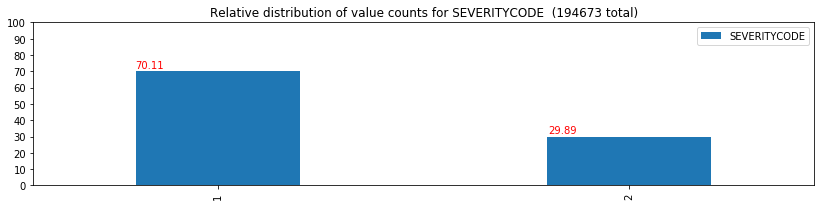

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
2/39: X
	total:	194673
	OK:	189339	(97.2600206500131%)
	NaN:	5334	(2.7399793499869007%)
----------HEAD----------
0   -122.323148
1   -122.347294
2   -122.334540
3   -122.334803
4   -122.306426
Name: X, dtype: float64

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
3/39: Y
	total:	194673
	OK:	189339	(97.2600206500131%)
	NaN:	5334	(2.7399793499869007%)
----------HEAD----------
0    47.703140
1    47.647172
2    47.607871
3    47.604803
4    47.545739
Name: Y, dtype: float64

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
4/39: OBJECTID
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    1
1    2
2    3
3    4
4    5
Name: OBJECTID, d

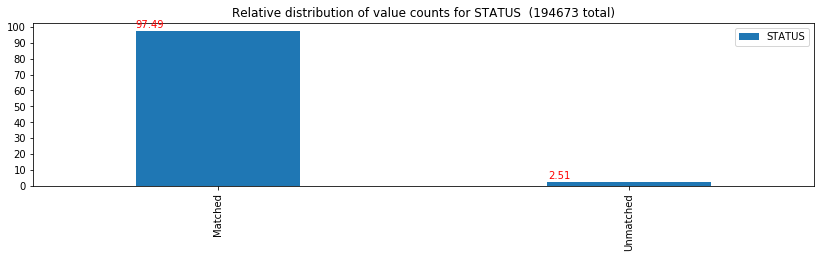

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
9/39: ADDRTYPE
	total:	194673
	OK:	192747	(99.01064862615772%)
	NaN:	1926	(0.9893513738422893%)
----------HEAD----------
0    Intersection
1           Block
2           Block
3           Block
4    Intersection
Name: ADDRTYPE, dtype: object



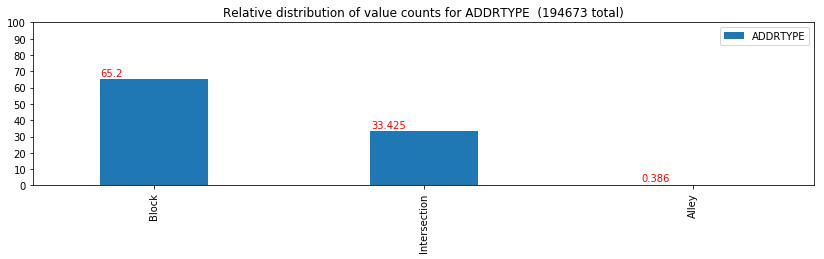

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
10/39: INTKEY
	total:	194673
	OK:	65070	(33.42528239663435%)
	NaN:	129603	(66.57471760336564%)
----------HEAD----------
0    37475.0
1        NaN
2        NaN
3        NaN
4    34387.0
Name: INTKEY, dtype: float64

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
11/39: LOCATION
	total:	194673
	OK:	191996	(98.62487350582772%)
	NaN:	2677	(1.3751264941722785%)
----------HEAD----------
0                     5TH AVE NE AND NE 103RD ST
1     AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
2    4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST
3       2ND AVE BETWEEN MARION ST AND MADISON ST
4                SWIFT AVE S AND SWIFT AV OFF RP
Name: LOCATION, dtype: object

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>

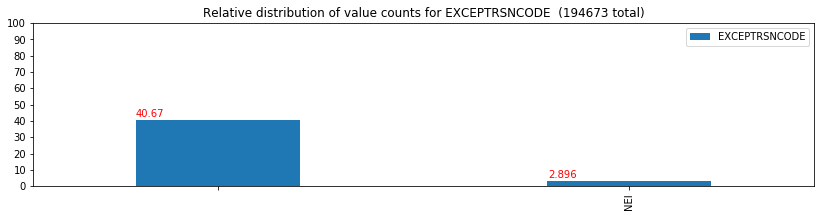

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
13/39: EXCEPTRSNDESC
	total:	194673
	OK:	5638	(2.8961386530232747%)
	NaN:	189035	(97.10386134697673%)
----------HEAD----------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: EXCEPTRSNDESC, dtype: object



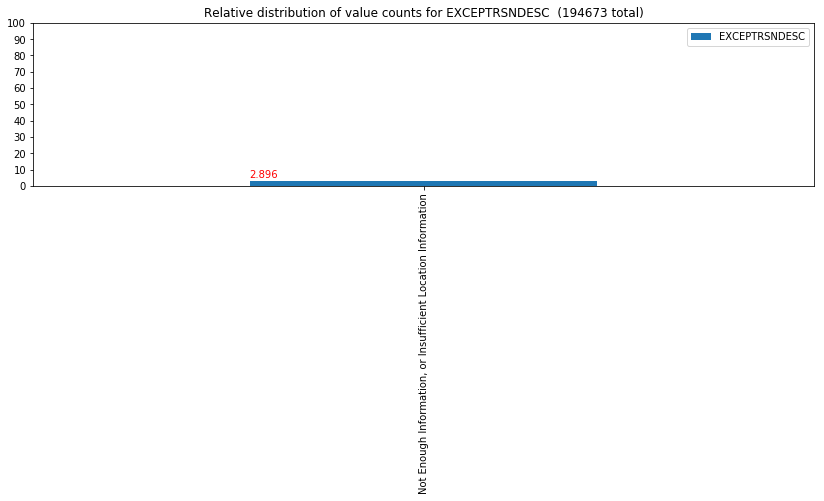

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
14/39: SEVERITYCODE.1
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE.1, dtype: int64



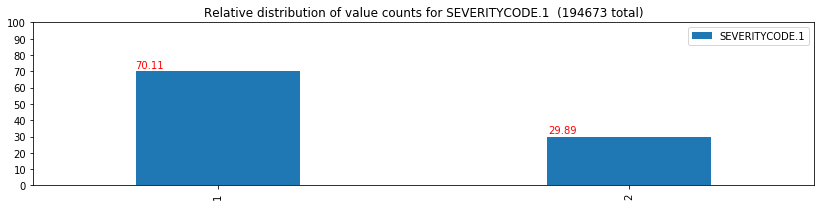

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
15/39: SEVERITYDESC
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0                  Injury Collision
1    Property Damage Only Collision
2    Property Damage Only Collision
3    Property Damage Only Collision
4                  Injury Collision
Name: SEVERITYDESC, dtype: object



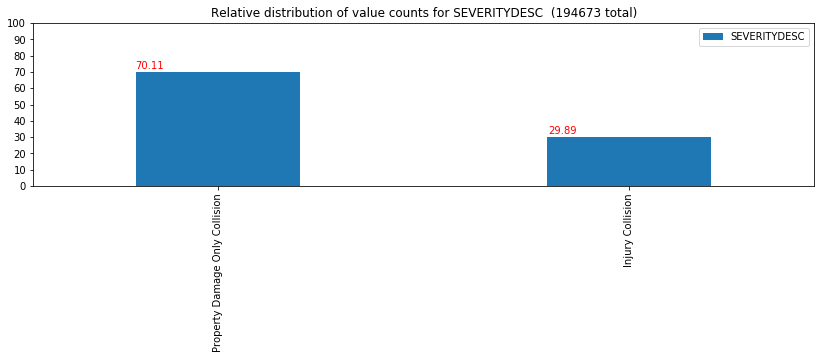

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
16/39: COLLISIONTYPE
	total:	194673
	OK:	189769	(97.4809038747027%)
	NaN:	4904	(2.5190961252972937%)
----------HEAD----------
0        Angles
1     Sideswipe
2    Parked Car
3         Other
4        Angles
Name: COLLISIONTYPE, dtype: object



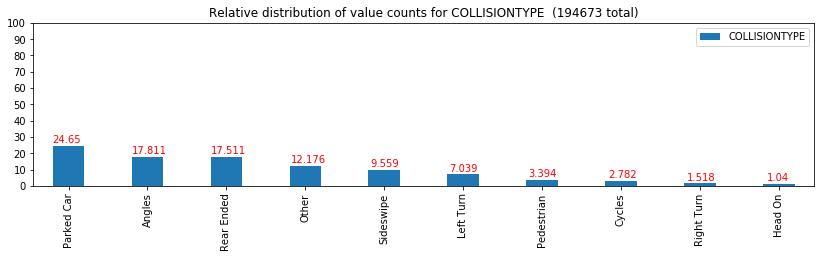

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
17/39: PERSONCOUNT
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    2
1    2
2    4
3    3
4    2
Name: PERSONCOUNT, dtype: int64



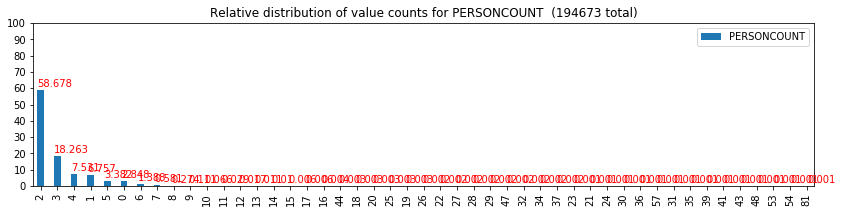

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
18/39: PEDCOUNT
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    0
1    0
2    0
3    0
4    0
Name: PEDCOUNT, dtype: int64



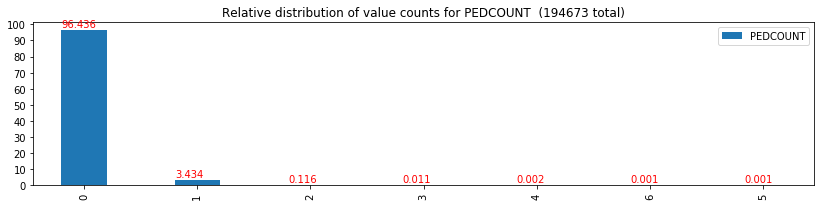

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
19/39: PEDCYLCOUNT
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    0
1    0
2    0
3    0
4    0
Name: PEDCYLCOUNT, dtype: int64



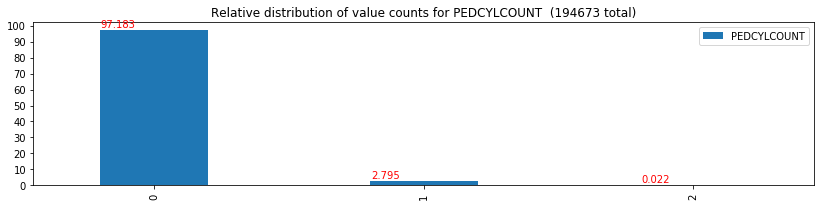

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
20/39: VEHCOUNT
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    2
1    2
2    3
3    3
4    2
Name: VEHCOUNT, dtype: int64



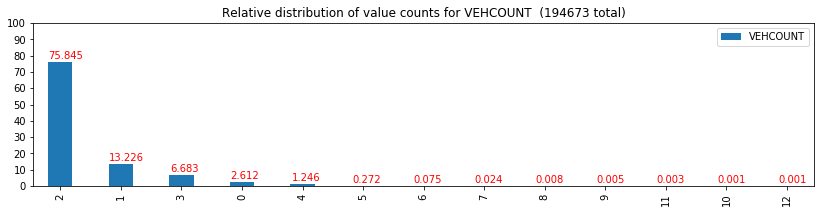

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
21/39: INCDTTM
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0      3/27/2013 2:54:00 PM
1     12/20/2006 6:55:00 PM
2    11/18/2004 10:20:00 AM
3      3/29/2013 9:26:00 AM
4      1/28/2004 8:04:00 AM
Name: INCDTTM, dtype: object

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
22/39: JUNCTIONTYPE
	total:	194673
	OK:	188344	(96.74890714171971%)
	NaN:	6329	(3.251092858280296%)
----------HEAD----------
0     At Intersection (intersection related)
1    Mid-Block (not related to intersection)
2    Mid-Block (not related to intersection)
3    Mid-Block (not related to intersection)
4     At Intersection (intersection related)
Name: JUNCTIONTYPE, dtype: object



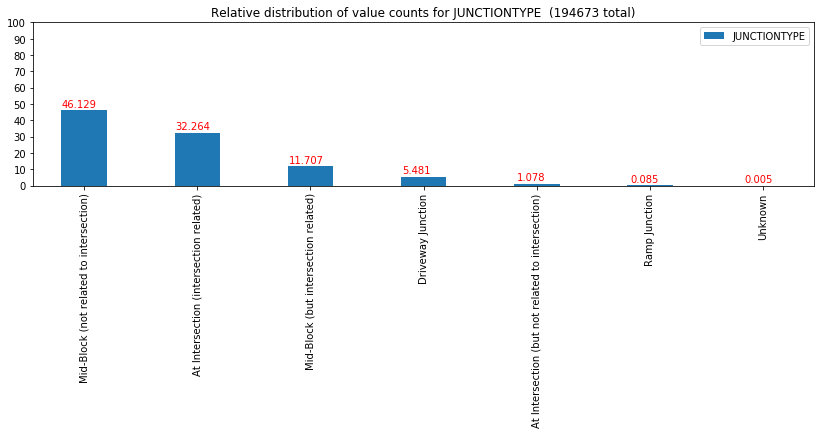

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
23/39: SDOT_COLCODE
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    11
1    16
2    14
3    11
4    11
Name: SDOT_COLCODE, dtype: int64



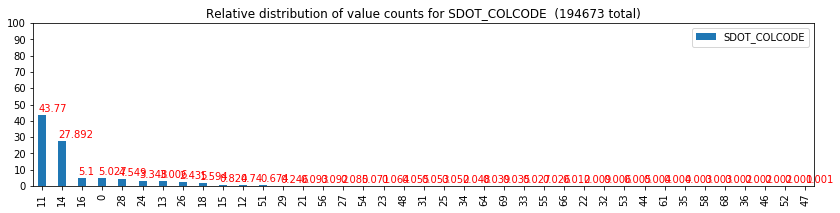

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
24/39: SDOT_COLDESC
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
1    MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...
2         MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END
3    MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
4    MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
Name: SDOT_COLDESC, dtype: object



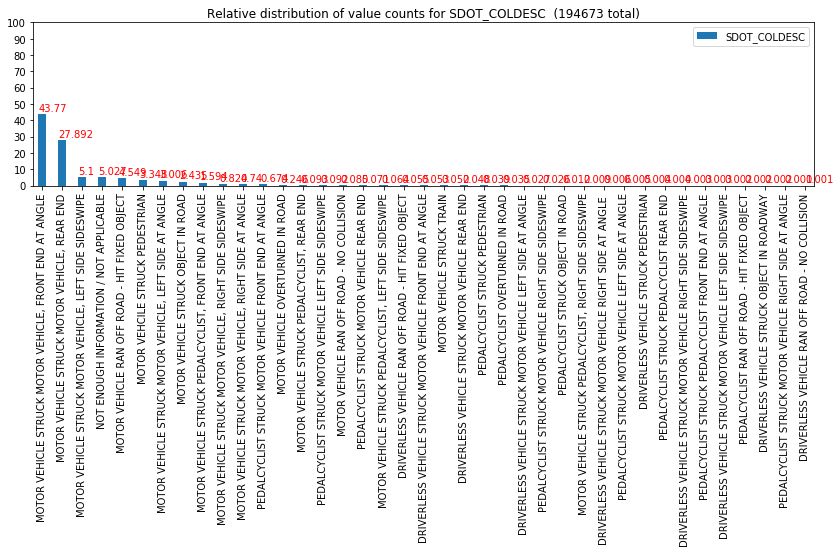

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
25/39: INATTENTIONIND
	total:	194673
	OK:	29805	(15.310289562497111%)
	NaN:	164868	(84.68971043750288%)
----------HEAD----------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: INATTENTIONIND, dtype: object



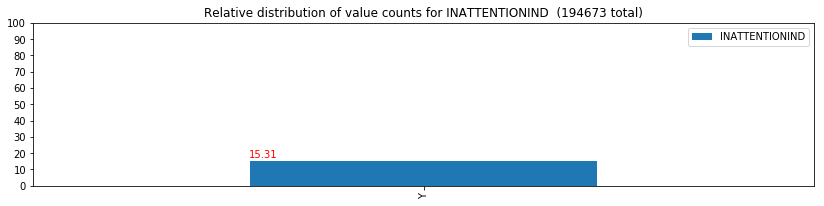

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
26/39: UNDERINFL
	total:	194673
	OK:	189789	(97.49117751306036%)
	NaN:	4884	(2.5088224869396374%)
----------HEAD----------
0    N
1    0
2    0
3    N
4    0
Name: UNDERINFL, dtype: object



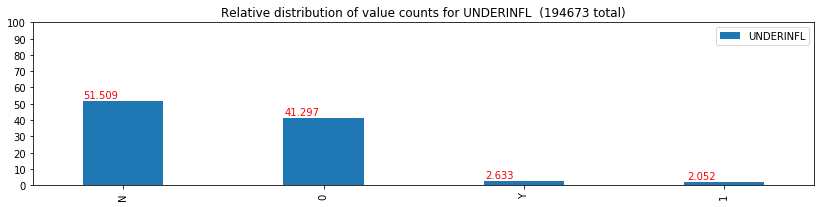

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
27/39: WEATHER
	total:	194673
	OK:	189592	(97.38998217523745%)
	NaN:	5081	(2.6100178247625507%)
----------HEAD----------
0    Overcast
1     Raining
2    Overcast
3       Clear
4     Raining
Name: WEATHER, dtype: object



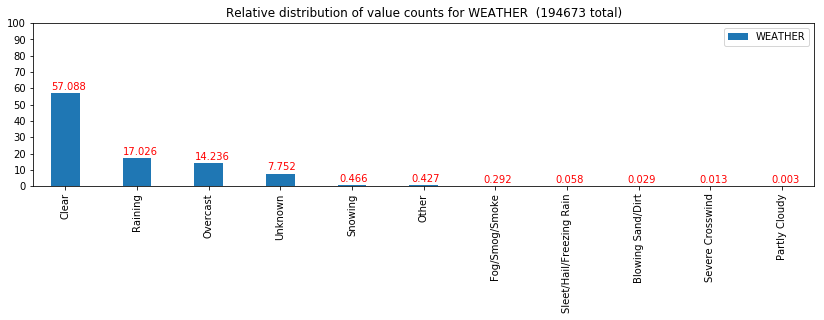

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
28/39: ROADCOND
	total:	194673
	OK:	189661	(97.42542622757136%)
	NaN:	5012	(2.5745737724286366%)
----------HEAD----------
0    Wet
1    Wet
2    Dry
3    Dry
4    Wet
Name: ROADCOND, dtype: object



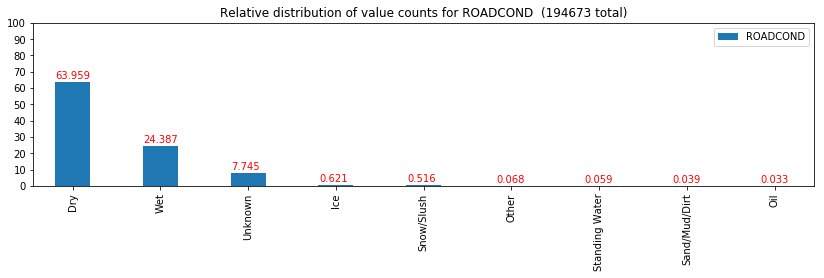

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
29/39: LIGHTCOND
	total:	194673
	OK:	189503	(97.34426448454589%)
	NaN:	5170	(2.6557355154541202%)
----------HEAD----------
0                   Daylight
1    Dark - Street Lights On
2                   Daylight
3                   Daylight
4                   Daylight
Name: LIGHTCOND, dtype: object



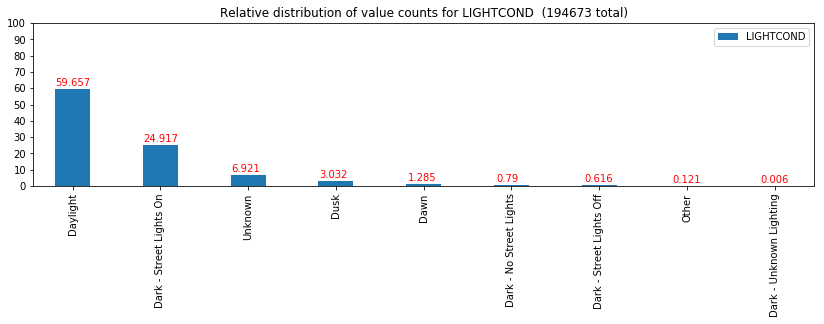

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
30/39: PEDROWNOTGRNT
	total:	194673
	OK:	4667	(2.3973535107590678%)
	NaN:	190006	(97.60264648924093%)
----------HEAD----------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PEDROWNOTGRNT, dtype: object



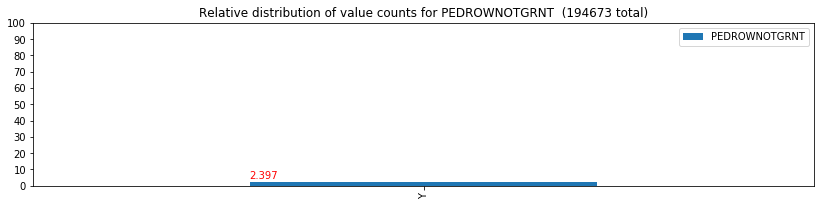

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
31/39: SDOTCOLNUM
	total:	194673
	OK:	114936	(59.04054491377849%)
	NaN:	79737	(40.95945508622151%)
----------HEAD----------
0          NaN
1    6354039.0
2    4323031.0
3          NaN
4    4028032.0
Name: SDOTCOLNUM, dtype: float64

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
32/39: SPEEDING
	total:	194673
	OK:	9333	(4.794193339600253%)
	NaN:	185340	(95.20580666039974%)
----------HEAD----------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SPEEDING, dtype: object



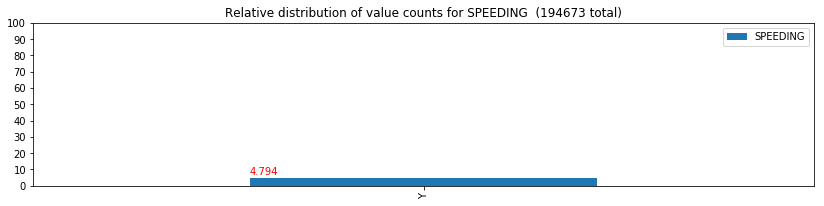

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
33/39: ST_COLCODE
	total:	194673
	OK:	194655	(99.99075372547811%)
	NaN:	18	(0.009246274521890554%)
----------HEAD----------
0    10
1    11
2    32
3    23
4    10
Name: ST_COLCODE, dtype: object

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
34/39: ST_COLDESC
	total:	194673
	OK:	189769	(97.4809038747027%)
	NaN:	4904	(2.5190961252972937%)
----------HEAD----------
0                                    Entering at angle
1    From same direction - both going straight - bo...
2                               One parked--one moving
3                     From same direction - all others
4                                    Entering at angle
Name: ST_COLDESC, dtype: object

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list

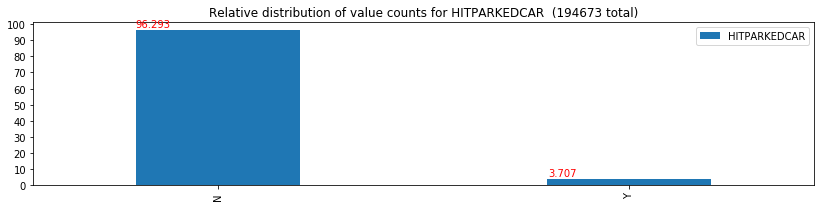

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>
######################################
38/39: YEAR
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    2013
1    2013
2    2013
3    2013
4    2013
Name: YEAR, dtype: int64



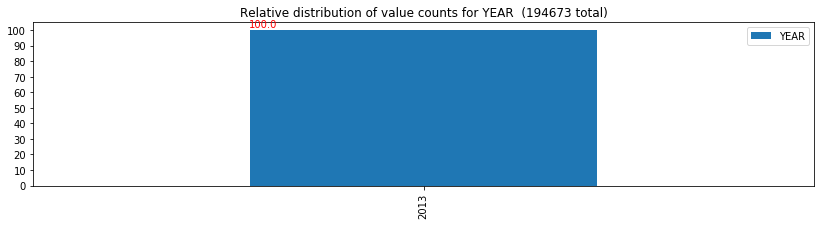

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d
######################################
39/39: MONTH
	total:	194673
	OK:	194673	(100.0%)
	NaN:	0	(0.0%)
----------HEAD----------
0    3
1    3
2    3
3    3
4    3
Name: MONTH, dtype: int64



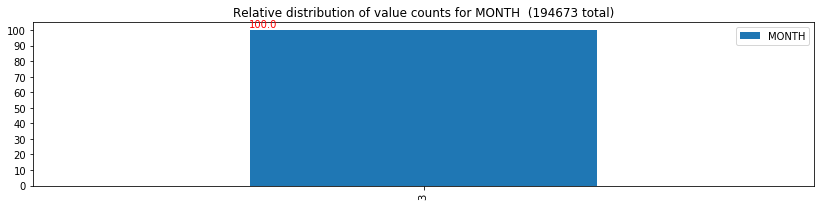

x: quit
i: cast to INT
f: cast to FLT
o: cast to OBJ
d: mark to DELETE (add to del_list)
else: skip
>>d


In [97]:
# Run interactive function to reformat columns
df_c_qc,del_list = df_type_qc(df_c)

The interactive script allows to efficiently go through the individual features, calculate the NaN values, data type, and show the distribution of unique vales (if below 50) in a histogram plot. User input is required to decide if the datatype of the respective column shall be casted into another format or if the whole column shall be flagged to be deleted in aa subsequent step. This is done in case the entry is irrelevant for the model building (e.g. `YEAR`/ `MONTH`since the data comprises only one month or `ST_COLCO` / `ST_COLDESC` which describe the accident) or if it contains too many NaN values.

In [99]:
# list with the flagged features that will be deleted
del_list

['INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'INTKEY',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'INCDTTM',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'ST_COLCODE',
 'ST_COLDESC',
 'YEAR',
 'MONTH']

In [557]:
# delete columns based on del_list entries
df_c_qc = df_c.copy()
df_c_qc.drop(del_list, axis=1, inplace=True)

# reformat and encode individual column entries into integers for 
# simple math. Hot-encoding is done in a subsequent step
feature="ADDRTYPE"
df_c_qc = df_c_qc[df_c_qc[feature].notna()]

feature="INATTENTIONIND"
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "0")
df_c_qc[feature] = df_c_qc[feature].replace("Y", "1")
df_c_qc[feature] = df_c_qc[feature].astype("int64", errors='ignore')

feature="HITPARKEDCAR"
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "0")
df_c_qc[feature] = df_c_qc[feature].replace("Y", "1")
df_c_qc[feature] = df_c_qc[feature].replace("N", "0")
df_c_qc[feature] = df_c_qc[feature].astype("int64")

feature="UNDERINFL"
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "0")
df_c_qc[feature] = df_c_qc[feature].replace("N", "0")
df_c_qc[feature] = df_c_qc[feature].replace("Y", "1")
df_c_qc[feature] = df_c_qc[feature].astype("int64", errors='ignore')

feature="SPEEDING"
df_c_qc[feature] = df_c_qc[feature].replace("Y", "1")
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "0")
df_c_qc[feature] = df_c_qc[feature].astype("int64", errors='ignore')

feature="WEATHER"
df_c_qc[feature] = df_c_qc[feature].replace("Other", "Unknown")
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "Unknown")
df_c_qc[(feature)+'_INT'] = df_c_qc[feature].replace({'Clear': '1', 
                                                      'Partly Cloudy': '2', 
                                                      'Overcast': '3', 
                                                      'Severe Crosswind': '4', 
                                                      'Raining':'6',
                                                      'Blowing Sand/Dirt':'7',
                                                      'Sleet/Hail/Freezing Rain': '8',
                                                      'Fog/Smog/Smoke':'9',
                                                      'Snowing':'10',
                                                      'Unknown':'5',               
                                                     })
df_c_qc[(feature)+'_INT'] = df_c_qc[(feature)+'_INT'].astype("int64", errors='ignore')

feature="ROADCOND"
df_c_qc[feature] = df_c_qc[feature].replace("Other", "Unknown")
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "Unknown")
df_c_qc[(feature)+'_INT'] = df_c_qc[feature].replace({'Dry': '1', 
                                                      'Sand/Mud/Dirt': '2', 
                                                      'Wet': '3', 
                                                      'Unknown': '4', 
                                                      'Standing Water':'5',
                                                      'Snow/Slush':'6',
                                                      'Ice': '7',
                                                      'Oil':'8',              
                                                     })
df_c_qc[(feature)+'_INT'] = df_c_qc[(feature)+'_INT'].astype("int64", errors='ignore')

feature="LIGHTCOND"
df_c_qc[feature] = df_c_qc[feature].replace("Other", "Unknown")
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "Unknown")
df_c_qc[feature] = df_c_qc[feature].replace("Dark - No Street Lights", "Dark - Street Lights Off")
df_c_qc[(feature)+'_INT'] = df_c_qc[feature].replace({'Daylight': '1', 
                                                      'Dusk': '2', 
                                                      'Dawn': '3', 
                                                      'Dark - Street Lights On': '4',
                                                      'Unknown': '5' ,
                                                      'Dark - Unknown Lighting':'6',
                                                      'Dark - Street Lights Off':'7',        
                                                     })
df_c_qc[(feature)+'_INT'] = df_c_qc[(feature)+'_INT'].astype("int64")



feature="LOCATION"
df_c_qc[(feature)+'_INT'] = pd.factorize(df_c_qc[feature])[0] + 1

feature="JUNCTIONTYPE"
df_c_qc[feature] = df_c_qc[feature].replace(np.nan, "Unknown")
df_c_qc[(feature)+'_INT'] = df_c_qc[feature].replace({'Mid-Block (not related to intersection)': '1', 
                                                      'At Intersection (intersection related)': '2', 
                                                      'Mid-Block (but intersection related)': '3', 
                                                      'Unknown': '4',
                                                      'At Intersection (but not related to intersection)': '5' ,
                                                      'Ramp Junction':'6',
                                                      'Driveway Junction':'7',        
                                                     })
df_c_qc[(feature)+'_INT'] = df_c_qc[(feature)+'_INT'].astype("int64")

feature="ADDRTYPE"
#df_c_qc[(feature)+'_INT'] = pd.factorize(df_c_qc[feature])[0] + 1
df_c_qc[(feature)+'_INT'] = df_c_qc[feature].replace({'Block': '1', 
                                                      'Alley': '2', 
                                                      'Intersection': '3',       
                                                     })
df_c_qc[(feature)+'_INT'] = df_c_qc[(feature)+'_INT'].astype("int64")

#plt_hist_col(df_c_qc,'ADDRTYPE_INT')
#df_c_qc.info()
#df_c_qc['ADDRTYPE'].head()
#df['ADDRTYPE_INT'].value_counts().to_frame()

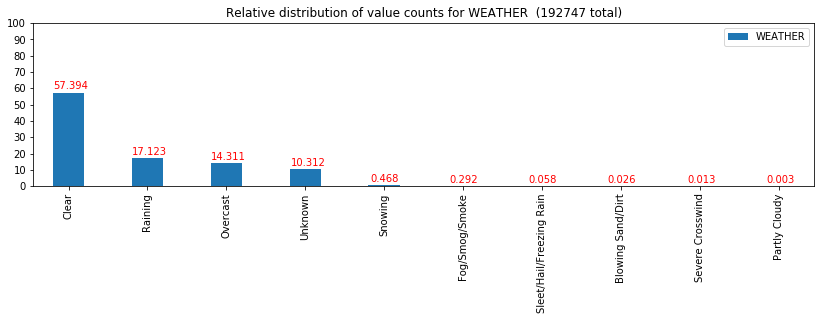

In [241]:
plt_hist_col(df_c_qc,'WEATHER')

<a id='exploratory_data_analysis'></a>
#### Exploratory Data Analysis
In this subsection, data correlations and feature relevance are being examined.

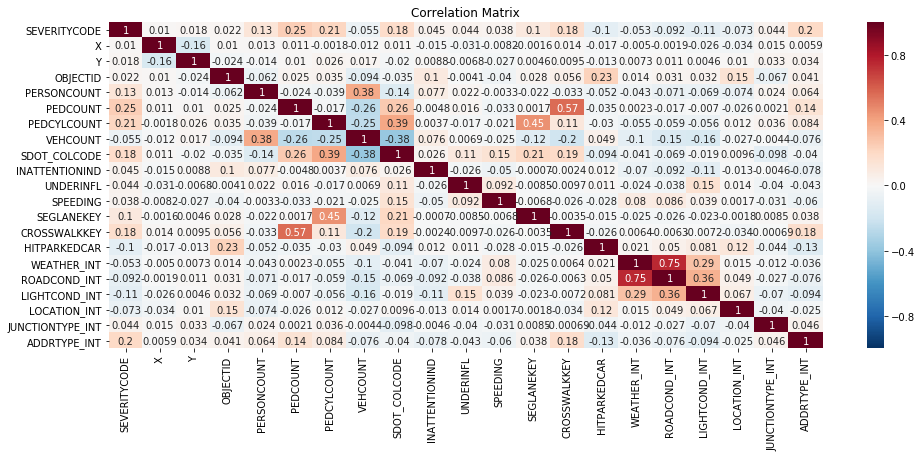

In [212]:
# Correlation matrix of cleaned-up dataframe
corr = df_c_qc.corr()

plt.figure(figsize = (16,6))
corr_plot = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='RdBu_r', vmin=-1, vmax=1, annot=True)
corr_plot.set_title('Correlation Matrix', fontsize=12)
corr_plot

A first look into the correlation matrix of the features from the cleaned-up dataframe reveals:

* As expected `X`/ `Y` have a low correlation value with the other data and can therefore be discarded
* Positive correlation between the involvement of pedestrians (`PEDCOUNT` /`CROSSWALKKEY` / `SEGLANEKEY`) or cyclists (`PEDCLCOUNT`) and severity `SEVERITYCODE`.
* A high positive correlation between `WEATHER_INT` and `ROADCOND_INT`
* A mild correlation between `UNDERINFL` and `LIGHTCOND_INT` suggesting drunk driving occurs more often at night.
    
Moreover, features like `OBJECTID`, `COLLISIONTYPE`, `SDOT_COLCODE` and `SDOT_COLCODESC` are assigned by the police after the accident and will therefore be dropped.

In [220]:
# clean-up final dataframe
df_c_fin = df_c_qc.drop(['X','Y','OBJECTID',
                         'SDOT_COLCODE', 'SDOT_COLDESC', 'ADDRTYPE', 'LOCATION', 
                         'COLLISIONTYPE'], axis=1)

In [509]:
feature="SEVERITYCODE"
s2_values = round(df_c_fin[feature].value_counts()[2] / (df_c_fin[feature].value_counts()[1]+df_c_fin[feature].value_counts()[2])*100,2)
print(f"Relative amount of type 2 (injuries) accidents of total dataset: {s2_values}%.")

Relative amount of type 2 (injuries) accidents of total dataset: 30.09%.


Analysis of the relative distribution of accidents, leading to property damage only (`SEVERITYCODE=1`) and accidents resulting in injuries (`SEVERITYCODE=2`), shows that with 30%, the latter is underrepresented in the unbalanced input dataset. Consequently all resulting models will be biased towards the former outcome of a collision.
An attempt to overcome this issue is made through **Synthetic Minority Oversampling** [below](#smote).

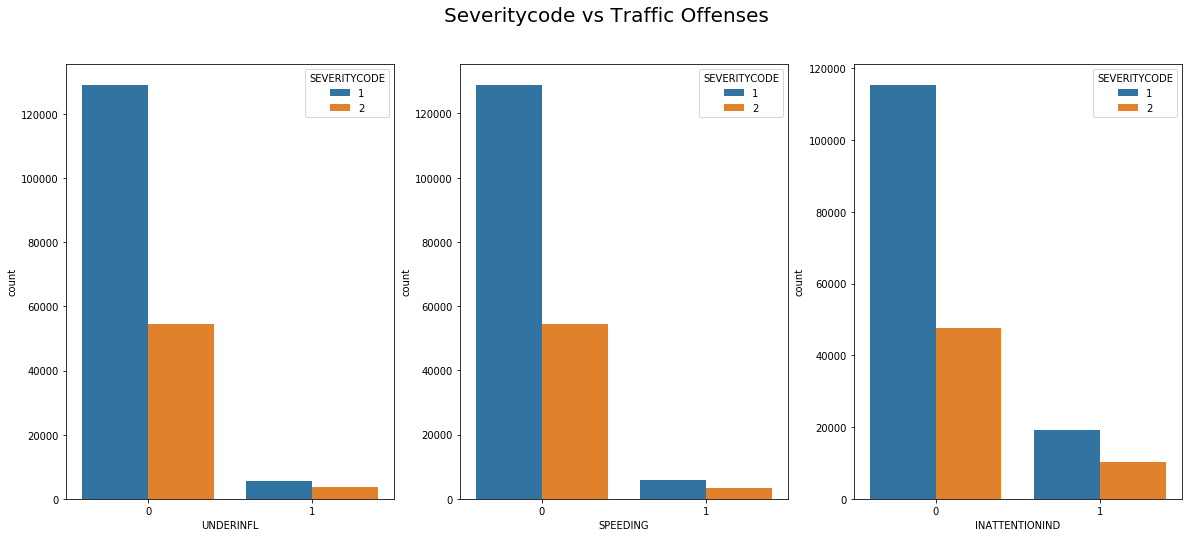

In [334]:
# Impact of features on severitycode #1: traffic offenses

target = "SEVERITYCODE"
features_law = ["UNDERINFL", "SPEEDING", "INATTENTIONIND"]

fig = plt.figure(figsize=(20, 8)) # create figure
fig.suptitle("Severitycode vs Traffic Offenses", fontsize='20')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#df_c_fin.plot(kind='bar', ax=ax1)
sns.catplot(x=features_law[0], kind='count', hue=target, data=df_c_fin, ax=ax1)
sns.catplot(x=features_law[1], kind='count', hue=target, data=df_c_fin, ax=ax2)
sns.catplot(x=features_law[2], kind='count', hue=target, data=df_c_fin, ax=ax3)
ax1.legend(loc='upper right',title=target)
ax2.legend(loc='upper right',title=target)
ax3.legend(loc='upper right',title=target)

plt.close(2) 
plt.close(3)
plt.close(4)

In [336]:
for i,f in enumerate(features_law):
    
    sev1Y = df_c_fin[(df_c_fin["SEVERITYCODE"] == 1) & (df_c_fin[f] == 1)].shape[0]
    sev1N = df_c_fin[(df_c_fin["SEVERITYCODE"] == 1) & (df_c_fin[f] == 0)].shape[0]
    
    sev2Y = df_c_fin[(df_c_fin["SEVERITYCODE"] == 2) & (df_c_fin[f] == 1)].shape[0]
    sev2N = df_c_fin[(df_c_fin["SEVERITYCODE"] == 2) & (df_c_fin[f] == 0)].shape[0]
    
    print(f"{f}:\n  {round(sev2Y / (sev1Y+sev2Y) * 100,2)}% of accidents with {f}=1 have {target}=2.")
    print(f"  {round(sev2N / (sev1N+sev2N) * 100,2)}% of accidents with {f}=0 have {target}=2.")

UNDERINFL:
  39.06% of accidents with UNDERINFL=1 have SEVERITYCODE=2.
  29.65% of accidents with UNDERINFL=0 have SEVERITYCODE=2.
SPEEDING:
  37.87% of accidents with SPEEDING=1 have SEVERITYCODE=2.
  29.7% of accidents with SPEEDING=0 have SEVERITYCODE=2.
INATTENTIONIND:
  34.97% of accidents with INATTENTIONIND=1 have SEVERITYCODE=2.
  29.2% of accidents with INATTENTIONIND=0 have SEVERITYCODE=2.


Analysis of `UNDERINFL`, `SPEEDING`, and  `INATTENTIONIND` vs `SEVERITYCODE` reveals that traffic offenses increase the risks for accidents resulting in injuries (`SEVERITYCODE 2`) by up to 10%.

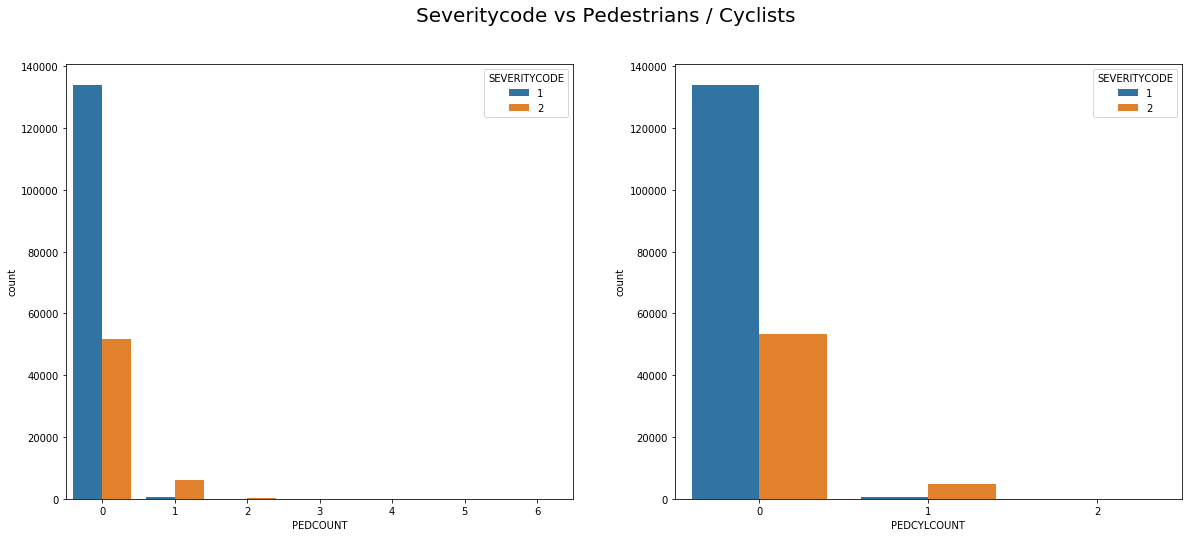

In [337]:
# Impact of features on severitycode #2: pedestrians / cyclists

target = "SEVERITYCODE"
features_ped = ["PEDCOUNT", "PEDCYLCOUNT"]

fig = plt.figure(figsize=(20, 8)) # create figure
fig.suptitle("Severitycode vs Pedestrians / Cyclists", fontsize='20')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.catplot(x=features_ped[0], kind='count', hue=target, data=df_c_fin, ax=ax1)
sns.catplot(x=features_ped[1], kind='count', hue=target, data=df_c_fin, ax=ax2)
ax1.legend(loc='upper right',title=target)
ax2.legend(loc='upper right',title=target)

plt.close(2) 
plt.close(3)

In [403]:
for i,f in enumerate(features_ped):
    
    sev1N = df_c_fin[(df_c_fin["SEVERITYCODE"] == 1) & (df_c_fin[f] == 0)].shape[0]
    sev1Y = df_c_fin[(df_c_fin["SEVERITYCODE"] == 1) & (df_c_fin[f] == 1)].shape[0]
    
    sev2N = df_c_fin[(df_c_fin["SEVERITYCODE"] == 2) & (df_c_fin[f] == 0)].shape[0]
    sev2Y = df_c_fin[(df_c_fin["SEVERITYCODE"] == 2) & (df_c_fin[f] == 1)].shape[0]
    
    print(f"{f}:\n  {round(sev2Y / (sev1Y+sev2Y) * 100,2)}% of accidents with {f}>=1 have {target}=2.")
    print(f"  {round(sev2N / (sev1N+sev2N) * 100,2)}% of accidents with {f}=0 have {target}=2.")

PEDCOUNT:
  89.85% of accidents with PEDCOUNT>=1 have SEVERITYCODE=2.
  27.86% of accidents with PEDCOUNT=0 have SEVERITYCODE=2.
PEDCYLCOUNT:
  87.53% of accidents with PEDCYLCOUNT>=1 have SEVERITYCODE=2.
  28.41% of accidents with PEDCYLCOUNT=0 have SEVERITYCODE=2.


Analysis of `PEDCOUNT` and `PEDCYLCOUNT` vs `SEVERITYCODE` reveals that accidents involving pedestrians or cyclists accidents increase the risk of injuries(`SEVERITYCODE 2`) by up to 70%.

<Figure size 1440x576 with 0 Axes>

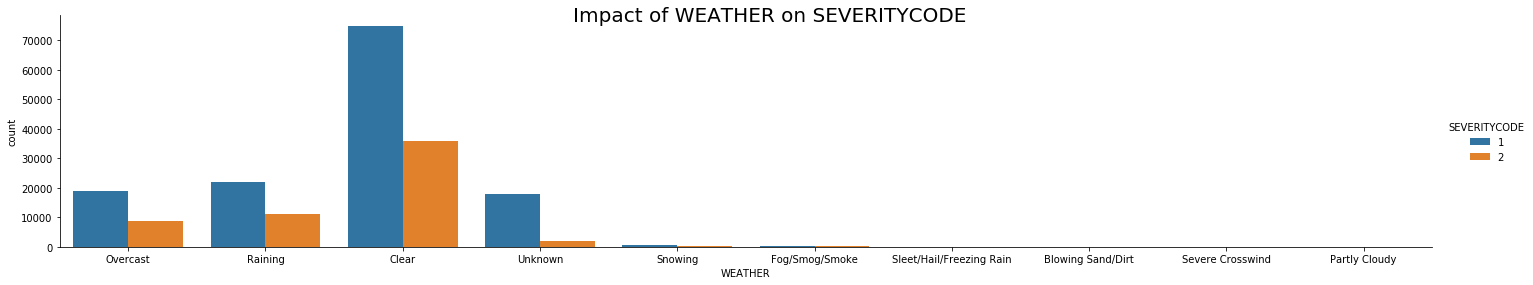

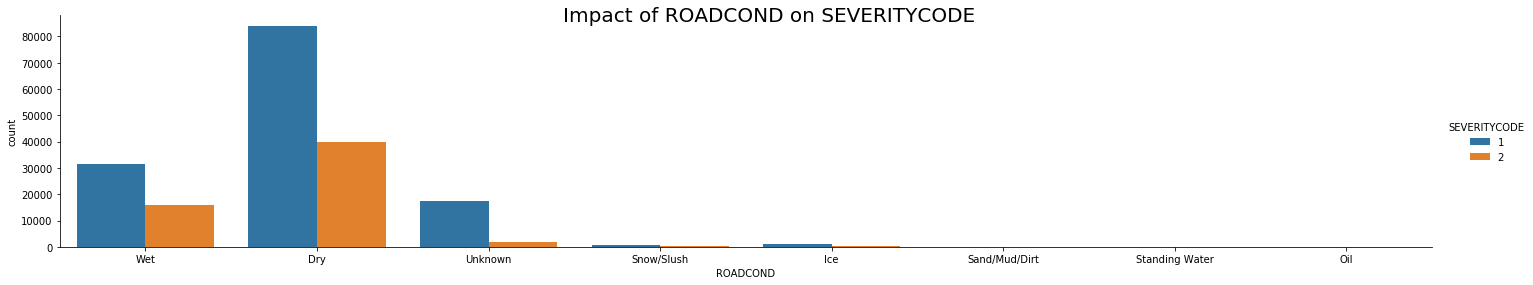

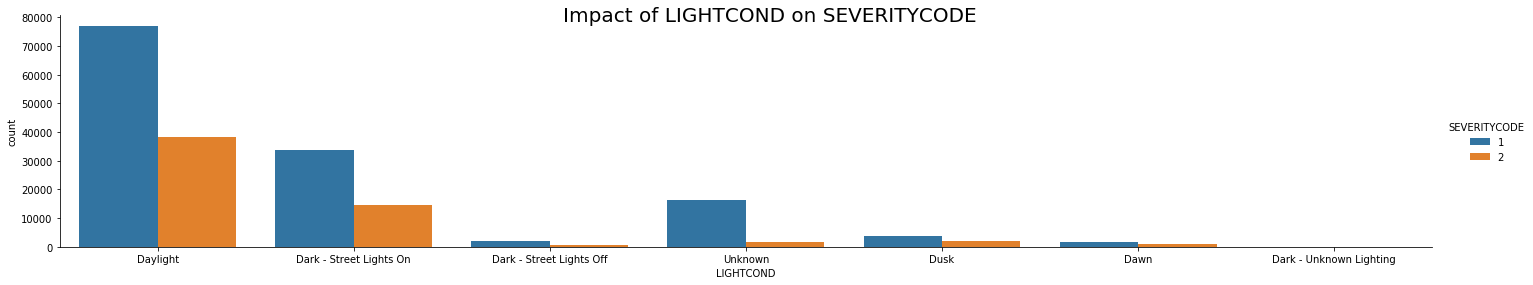

In [376]:
# Impact of features on severitycode #3: weather, daytime, road condition

target = "SEVERITYCODE"
features_ext = ["WEATHER", "ROADCOND", "LIGHTCOND"]

fig = plt.figure(figsize=(20, 8))

ax1 = sns.catplot(x=features_ext[0], kind='count', hue=target, data=df_c_fin, height=4, aspect=5)
ax1.fig.suptitle(('Impact of '+features_ext[0]+' on '+target),size=20)

ax2 = sns.catplot(x=features_ext[1], kind='count', hue=target, data=df_c_fin, height=4, aspect=5)
ax2.fig.suptitle(('Impact of '+features_ext[1]+' on '+target),size=20)

ax3 = sns.catplot(x=features_ext[2], kind='count', hue=target, data=df_c_fin, height=4, aspect=5)
ax3.fig.suptitle(('Impact of '+features_ext[2]+' on '+target),size=20)

plt.show()


In [443]:
# Playing around with dictionary for practice here
#initialise dictionary to count distibution of feature values per SEVERITYCODE
sev_dict = {1:[0,0],2:[0,0],3:[0,0],4:[0,0],5:[0,0],6:[0,0],7:[0,0],8:[0,0],9:[0,0],10:[0,0]}

features_ext_int = ["WEATHER_INT", "ROADCOND_INT", "LIGHTCOND_INT"]

for feature_name in features_ext_int:
    print(feature_name)
    #outer loop over severity code (1/2)
    for sevcode in range(1,3,1):
        feature_length = df_c_fin[feature_name].nunique() #count number of unique features

        for feature_code in range(1,feature_length+1,1):
            sev_dict[feature_code][sevcode-1] = df_c_fin[(df_c_fin["SEVERITYCODE"] == sevcode) & (df_c_fin[feature_name] == feature_code)].shape[0]


            total = sev_dict[feature_code][0]+sev_dict[feature_code][1]
            if sevcode == 2:
                print(f"  {round(sev_dict[feature_code][1] / (total) * 100,2)}% of accidents with feature code = {feature_code} have {target}=2. ({total} counts)")
        


WEATHER_INT
  32.32% of accidents with feature code = 1 have SEVERITYCODE=2. (110626 counts)
  60.0% of accidents with feature code = 2 have SEVERITYCODE=2. (5 counts)
  31.62% of accidents with feature code = 3 have SEVERITYCODE=2. (27584 counts)
  28.0% of accidents with feature code = 4 have SEVERITYCODE=2. (25 counts)
  9.91% of accidents with feature code = 5 have SEVERITYCODE=2. (19876 counts)
  33.78% of accidents with feature code = 6 have SEVERITYCODE=2. (33004 counts)
  26.0% of accidents with feature code = 7 have SEVERITYCODE=2. (50 counts)
  24.11% of accidents with feature code = 8 have SEVERITYCODE=2. (112 counts)
  33.04% of accidents with feature code = 9 have SEVERITYCODE=2. (563 counts)
  18.74% of accidents with feature code = 10 have SEVERITYCODE=2. (902 counts)
ROADCOND_INT
  32.24% of accidents with feature code = 1 have SEVERITYCODE=2. (123945 counts)
  29.73% of accidents with feature code = 2 have SEVERITYCODE=2. (74 counts)
  33.23% of accidents with feature 

Analysis of external features like `WEATHER`, `ROADCOND`, or `LIGHT_COND` reveal that:
* Most accidents, resulting in injuries occur under *partly cloudy* `WEATHER` conditions. However, this result is statistically not stable, as only 5 accidents occured under this condition. Other weather conditions resulting in injuries are *rainy* (33.78%) and *fog/smog/smoke* (33.04%) and *clear* (32.32%). While it is logic, that reduced visibility and aquaplaning may increase accident numbers, high injury rates during clear weather seems counterintuituve at first glance. However, considering the fact that involvement of pedestrians / cyclists in accidents increases the risk of injury by around 70% and assuming that it is more likely for them to be on the streets if the weather is good, this is less surprising.


* *Oily* road conditions (`ROADCOND`) bare the highest risk to lead to accidents with injuries (37.5%). With only 64 counts, however, this statement is statistically not stable. Other road conditions, leading to accidents with injuries (*wet*, 33.23% and *dry* 32.24%) correlate with the weather conditions.


* Analysis of the `LIGHTCOND` feature shows that around 1/3 of all accidents happening during *daylight*, *dusk*, or *dawn* lead to injuries. Injuries are less likely to happen during night time due to the reduced number of pedestrians / cyclists on the street. The suspiciously low value of 9.55% is corresponds to the "Unknown" category. 

In [442]:
# Impact of features on severitycode #3: location

#initialise dictionary to count distibution of feature values per SEVERITYCODE
sev_dict = {1:[0,0],2:[0,0],3:[0,0],4:[0,0],5:[0,0],6:[0,0],7:[0,0],8:[0,0],9:[0,0],10:[0,0]}

features_loc = ["JUNCTIONTYPE_INT", "ADDRTYPE_INT"]

for feature_name in features_loc:
    print(feature_name)
    #outer loop over severity code (1/2)
    for sevcode in range(1,3,1):
        feature_length = df_c_fin[feature_name].nunique() #count number of unique features

        for feature_code in range(1,feature_length+1,1):
            sev_dict[feature_code][sevcode-1] = df_c_fin[(df_c_fin["SEVERITYCODE"] == sevcode) & (df_c_fin[feature_name] == feature_code)].shape[0]


            total = sev_dict[feature_code][0]+sev_dict[feature_code][1]
            if sevcode == 2:
                print(f"  {round(sev_dict[feature_code][1] / (total) * 100,2)}% of accidents with feature code = {feature_code} have {target}=2. ({total} counts)")
        

JUNCTIONTYPE_INT
  21.64% of accidents with feature code = 1 have SEVERITYCODE=2. (89517 counts)
  43.27% of accidents with feature code = 2 have SEVERITYCODE=2. (62786 counts)
  32.03% of accidents with feature code = 3 have SEVERITYCODE=2. (22775 counts)
  5.38% of accidents with feature code = 4 have SEVERITYCODE=2. (4739 counts)
  29.72% of accidents with feature code = 5 have SEVERITYCODE=2. (2096 counts)
  31.71% of accidents with feature code = 6 have SEVERITYCODE=2. (164 counts)
  30.3% of accidents with feature code = 7 have SEVERITYCODE=2. (10670 counts)
ADDRTYPE_INT
  23.71% of accidents with feature code = 1 have SEVERITYCODE=2. (126926 counts)
  10.92% of accidents with feature code = 2 have SEVERITYCODE=2. (751 counts)
  42.75% of accidents with feature code = 3 have SEVERITYCODE=2. (65070 counts)


Analysis of data features `JUNCTIONTYPE_INT` and `ADDRTYPE_INT`, describing the location of the collision shows that most accidents leading to injuries are intersection related (43.27% and 42.75%, respectively). The features contain similar information. Due to the higher granularity, `JUNCTIONTYPE_INT` will be kept.

#### One-Hot Encoder
**One-Hot Encoding** is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms.

This method is required to use categorical data in ML techniques as they assume natural ordering between the encoded integers, which results in a poor model performance.
For the modelling, the following features will be one-hot encoded: `JUNCTIONTYPE`, `LIGHTCOND`, `WEATHER`, `ROADCOND`.
More information can be found [here](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).
    

In [555]:
# One-Hot encode categorical data of cleaned-up dataframe df_c_fin
df_weather = pd.get_dummies(df_c_fin.WEATHER, prefix="WEATHER")
df_roadcond = pd.get_dummies(df_c_fin.ROADCOND, prefix="ROADCOND")
df_junction = pd.get_dummies(df_c_fin.JUNCTIONTYPE, prefix="JUNCTIONTYPE")
df_light = pd.get_dummies(df_c_fin.LIGHTCOND, prefix="LIGHTCOND") 

df_1hot = pd.concat([df_light, df_junction, df_roadcond, df_weather], axis=1)

#create list
features_1hot = df_1hot.columns

<a id='smote'></a>
#### Synthetic Minority Oversampling Technique (SMOTE)
Method for oversampling examples in an underrepresented feature classs in order to overcome imbalanced classification bias.
More information can be found [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

### Linear Multi-Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
- The predictor/independent variable (final_features, X)
- The response/dependent variable (target, Y)


The MSR is:  0.18303501621542356
The R-square is:  0.12988805015177218


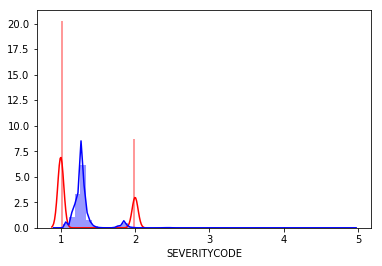

In [516]:
target = "SEVERITYCODE"

features_loc = ["JUNCTIONTYPE_INT"]
features_ext = ["LIGHTCOND_INT", "WEATHER_INT", "ROADCOND_INT"]
features_ped = ["PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]
features_law = ["SPEEDING", "UNDERINFL", "INATTENTIONIND"]

features_final = features_ped + features_law + features_ext + features_loc

lm = LinearRegression()
X = df_c_fin[features_final]
Y = df_c_fin[target]
lm.fit(X,Y)
Yhat = lm.predict(X)

ax1 = sns.distplot(Y, hist=True, color="r", label="Actual Value")
sns.distplot(Yhat, hist=True, color="b", label="Fitted Values", ax=ax1)

mse = mean_squared_error(Y,Yhat)
print('The MSR is: ', mse)
print('The R-square is: ', lm.score(X, Y))

In [528]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

target = "SEVERITYCODE"

features_loc = ["JUNCTIONTYPE_INT"]
features_ext = ["LIGHTCOND_INT", "WEATHER_INT", "ROADCOND_INT"]
features_ped = ["PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]
features_law = ["SPEEDING", "UNDERINFL", "INATTENTIONIND"]

features_final = features_ped + features_law + features_ext + features_loc

X = df_c_fin[features_final]
Y = df_c_fin[target]

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.7,random_state=0)

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    Yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, Yhat)
    
    std_acc[n-1]=np.std(Yhat==y_test)/np.sqrt(Yhat.shape[0])
    
mean_acc


array([0.63713377, 0.73173588, 0.69628603, 0.73919198, 0.73178776,
       0.74108936, 0.72694055, 0.73125412, 0.73089836, 0.73559734,
       0.72766689, 0.73057966, 0.72914922, 0.73610874, 0.73413725,
       0.74426154, 0.73686473, 0.7377393 , 0.7362718 ])

### Conclusions 
* The dataset covers only one month and is biased by day time (60% of values recorded during the day vs 40% recorded at night). For a model, that is applicable for the whole year (and all weather conditions), additional months need to be considered for the training and potential split into week days / weekend etc.
* Model accuracy can be further improved by grouping dependent features into groups and thus reducing model bias (e.g. good-moderate-bad driving conditions, which is influenced by `LIGHTCOND`, `WEATHER`, `ROADCOND`).
* Due to the fundamentally different traffic situation during day- and night time it might make sense to test the efficiency of two Individual models.
* The model is currently biased by the average boundary conditions of a single month, with some feature attributes more represented than others. An improvement of the model is further expected by balancing them them and using more training data.
* Analysis of the relative distribution of accidents, leading to property damage only (`SEVERITYCODE=1`) and accidents resulting in injuries (`SEVERITYCODE=2`), shows that with 30%, the latter is underrepresented in the unbalanced input dataset. Consequently all resulting models will be biased towards the former outcome of a collision.

In [502]:
X

PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  LIGHTCOND_INT  WEATHER_INT  \
0              0            0         2              1            3   
1              0            0         2              4            6   
2              0            0         3              1            3   
3              0            0         3              1            1   
4              0            0         2              1            6   
...          ...          ...       ...            ...          ...   
194668         0            0         2              1            1   
194669         0            0         2              1            6   
194670         0            0         2              1            1   
194671         0            1         1              2            1   
194672         0            0         2              1            1   

        ROADCOND_INT  SPEEDING  UNDERINFL  INATTENTIONIND  
0                  3         0          0               0  
1                  3         0          0               0  
2                  1         0          0               0  
3                  1         0          0               0  
4                  3         0          0               0  
...              ...       ...        ...             ...  
194668             1         0          0               0  
194669             3         0          0               1  
194670             1         0          0               0  
194671             1         0          0               0  
194672             3         0          0               0  

[192747 rows x 9 columns]

In [529]:
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df_c_fin)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()


ValueError: Could not interpret input 'SEVERITYDESC'

In [ ]:
df.is